# EXP24：液晶电光效应及其应用

> [@Maxwell Jay](https://github.com/MaxwellJay256), 2024.5.1

## 程序说明

实验需要绘制两幅图：
1. 夹角与输出功率关系图
2. 驱动电压与透射率关系图

## 使用方法

1. 按下文说明手动输入实验数据
2. Python 环境依赖：`math` 和 `matplotlib` 库
3. 分别运行两段代码，即可得到两幅图

### 1. 夹角与输出功率关系

需要手动编辑的参数：
1. `power_0`：偏振片下的最大输出功率
2. `power`：在各个角度下测得的输出功率


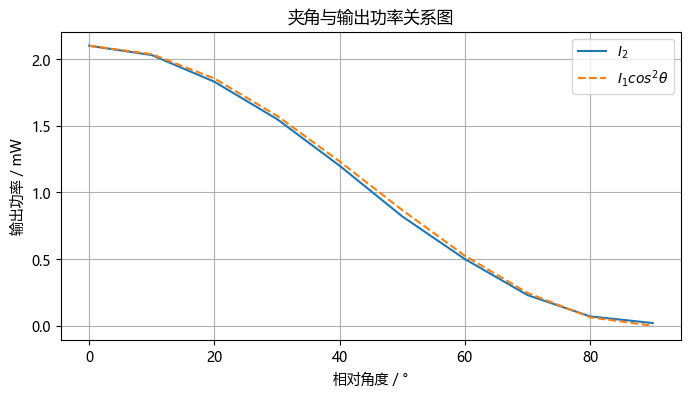

In [9]:
from math import cos
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']

power_0 = 2.10 # mW
angle = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90] # °
power = [2.10, 2.03, 1.83, 1.55, 1.20, 0.82, 0.50, 0.23, 0.07, 0.02] # mW

# 计算 I_0 * cos^2(theta)
power_1_simulation = [power_0 * cos(angle[i] * 3.1415926 / 180) ** 2 for i in range(len(angle))]

# 画图
plt.figure(figsize=(8, 4))
plt.plot(angle, power, label='$I_2$')
plt.plot(angle, power_1_simulation, label='$I_1 cos^2 \\theta$', linestyle='--')
plt.xlabel('相对角度 / °')
plt.ylabel('输出功率 / mW')
plt.title('夹角与输出功率关系图')
plt.legend()
plt.grid()
plt.savefig('夹角与输出功率关系图.png')
plt.show()

### 2. 驱动电压与透射率关系

需要手动编辑的参数：
1. `voltage`：你设置的驱动电压关注区间，我在这里比实验需要的多了两组
2. `power`：3 次重复实验测得的透射功率。如果你只测量了 1 组或者 2 组数据，减少这个列表的行数即可，不影响代码的运行。
3. `T_max`：根据实验指导书，在液晶盒下能得到的最大透射功率。

运行代码后，除了图像还会输出 `power` 的平均值和透射率的计算值。

平均透射功率：1.12 | 1.119 | 1.114 | 1.105 | 1.092 | 1.059 | 1.015 | 0.921 | 0.635 | 0.282 | 0.139 | 0.108 | 
透射率：93.36 | 93.22 | 92.86 | 92.06 | 90.97 | 88.22 | 84.58 | 76.72 | 52.94 | 23.53 | 11.56 | 9.03 | 

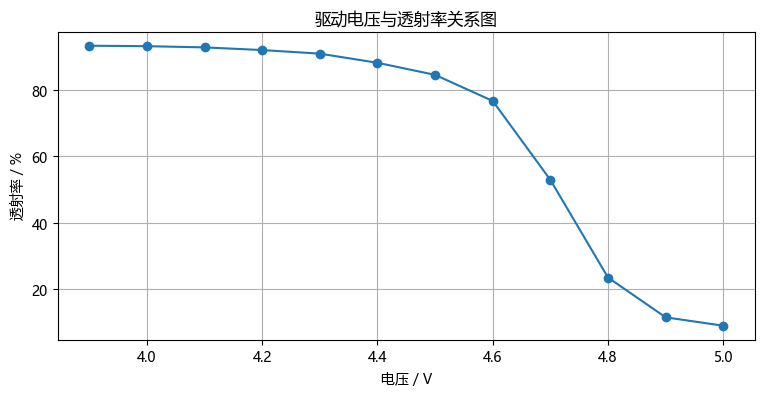

In [8]:
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']

voltage = [3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0]
power = [
    [1.130, 1.128, 1.123, 1.114, 1.097, 1.054, 1.019, 0.900, 0.642, 0.293, 0.152, 0.112],
    [1.102, 1.100, 1.096, 1.089, 1.080, 1.054, 1.004, 0.912, 0.612, 0.285, 0.141, 0.104],
    [1.129, 1.128, 1.124, 1.111, 1.098, 1.068, 1.022, 0.950, 0.652, 0.269, 0.123, 0.109]
] # 透射功率（mW），3 次测量

# 计算 3 次功率的平均值
power_avg = [sum([power[j][i] for j in range(len(power))]) / len(power) for i in range(len(power[0]))] # 平均透射功率
print('平均透射功率：', end='')
for i in range(len(power_avg)):
    print(round(power_avg[i], 3), end=' | ')

# 计算透射率
T_max = 1.20 # 最大输出功率（mW）
transmissivity = [power_avg[i] / T_max * 100 for i in range(len(power_avg))] # 透射率（%）
print('\n透射率：', end='')
for i in range(len(transmissivity)):
    print(round(transmissivity[i], 2), end=' | ')

# 画图
plt.figure(figsize=(9, 4))
plt.plot(voltage, transmissivity, '-o')
plt.xlabel('电压 / V')
plt.ylabel('透射率 / %')
plt.title('驱动电压与透射率关系图')
plt.grid()
plt.savefig('驱动电压与透射率关系图.png')
plt.show()
